# Assignment -3
# Time Series
28/01/2022


# Q1-----------------------------------------------------


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
import warnings 
warnings.filterwarnings('ignore')

In [3]:

df =pd.DataFrame({'a':[2.34 ,1.47, 1.13 ,0.62, 1.51, 0.78 ,-0.02, 1.04 ,0.80, 1.42]})
df

,a
0,2.34
1,1.47
2,1.13
3,0.62
4,1.51
5,0.78
6,-0.02
7,1.04
8,0.80
9,1.42


In [4]:
#ρk values
arr3 = acf(df['a'])
arr3

array([ 1.        ,  0.13465632, -0.02316728, -0.05216733,  0.04375919,
       -0.1484339 , -0.43390064, -0.05238907, -0.07394267,  0.10558539])

In [5]:
for ind,i in enumerate(arr3[:5]):
    print('\u03C1',ind,':',i)

ρ 0 : 1.0
ρ 1 : 0.1346563188624034
ρ 2 : -0.02316727755116689
ρ 3 : -0.05216732995209452
ρ 4 : 0.04375918739950749


# 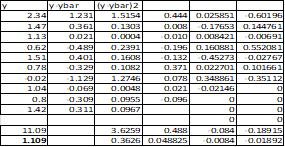

### Q2 For the following data series of 30 observations, plot ACF and PACF and Identify the suitable model and Coefficients (Hint: can use auto_arima method)?


In [6]:

df3 =pd.DataFrame({'a':[487 ,577, 651, 1107, 1427,511, 598 ,689 ,1293 ,1450,537 ,548 ,696 ,1532, 1476,548 ,599 ,661 ,1396, 1502,538, 651 ,751, 1283, 1534,561, 632, 883 ,1403, 1543]})
df3

,a
0,487
1,577
2,651
3,1107
4,1427
5,511
6,598
7,689
8,1293
9,1450


In [8]:
import math
print('SE:',1/math.sqrt(len(df3['a'])-1))
SE=1/math.sqrt(len(df3['a'])-1)

SE: 0.18569533817705186


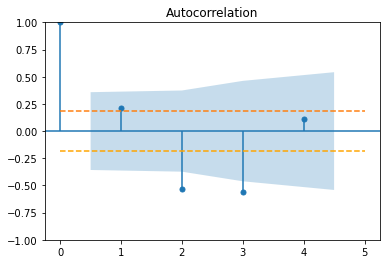

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation'
#lags = 4
plot_acf(df3,title=title,lags=4);
plt.plot([SE for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-SE for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

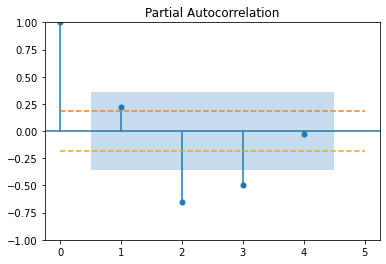

In [10]:
title='Partial Autocorrelation'
#lags=4
plot_pacf(df3,title=title,lags=4);
plt.plot([SE for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-SE for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

In [11]:
import math

In [12]:
# in MA And AR model graph we found that value of ACF and PACF for 1 lag from SE of data. so p=1 and q=1

# MA(q=1)and AR (p=1)

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [14]:
print('Augmented Dickey-Fuller Test ')
dftest = adfuller(df3['a'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
#print(dfout)
adf_test(df3['a'])

Augmented Dickey-Fuller Test 
Augmented Dickey-Fuller Test: 
ADF test statistic      -1.254685
p-value                  0.649641
# lags used              4.000000
# observations          25.000000
critical value (1%)     -3.723863
critical value (5%)     -2.986489
critical value (10%)    -2.632800
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [15]:
# data is non stationary so we can transform this data to stationary or we can use directly ARIMA model directly.

<AxesSubplot:ylabel='VALUES'>

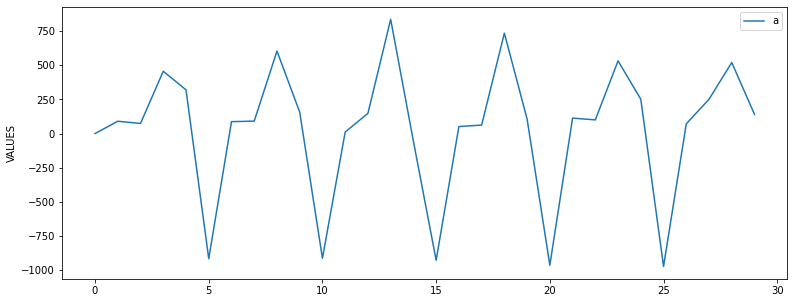

In [16]:
# Transform non-stationary to Stationary
df3['a']=df3['a'].diff(periods=1)
df3.fillna(0,inplace=True)
df3['a'].plot(figsize= (13,5), legend= True, ylabel='VALUES')

In [17]:
adf_test(df3['a']) # Now Our data is Stationary ...

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.401161e+01
p-value                 3.705162e-26
# lags used             3.000000e+00
# observations          2.600000e+01
critical value (1%)    -3.711212e+00
critical value (5%)    -2.981247e+00
critical value (10%)   -2.630095e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


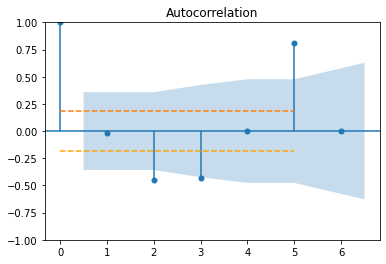

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation'
#lags = 4
plot_acf(df3,title=title,lags=6);
plt.plot([SE for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-SE for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

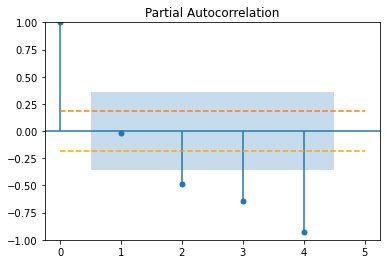

In [19]:
title='Partial Autocorrelation'
#lags=4
plot_pacf(df3,title=title,lags=4);
plt.plot([SE for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-SE for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

In [20]:
# here seasonal component present 

In [22]:

auto_arima(df3['a'],seasonal=True,m=5).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                   30
Model:             SARIMAX(0, 1, 0, 5)   Log Likelihood                -169.653
Date:                 Tue, 01 Feb 2022   AIC                            341.306
Time:                         18:53:13   BIC                            342.525
Sample:                              0   HQIC                           341.644
                                  - 30                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.59e+04   5182.021      8.858      0.000    3.57e+04    5.61e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               121.03
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -2.73
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# Suitable Model Is SARIMA(5,0,1) 

# Q3 --------------------------------------------------

In [24]:

df4 =pd.DataFrame({'a':[2.34, -0.02, -0.96 ,2.70 ,0.79
,1.47 ,1.04 ,0.29, 2.63, 1.89,
1.13 ,0.80 ,2.56, 2.44 ,4.36,
0.62, 1.42, 3.33, 1.38, 2.23,
1.51, 1.15 ,3.74, 1.11, 2.19,
0.78, 1.57, 2.88, 1.10, 0.59]})
df4
# Add a "date" datetime column
df4['date']=pd.date_range(start='2020-01-01', end='2020-01-30').to_pydatetime().tolist()


In [25]:
# Set "date" to be the index
df4.set_index('date',inplace=True)
#df.index.freq = 'MS'
df4.head()

,a
date,
2020-01-01,2.34
2020-01-02,-0.02
2020-01-03,-0.96
2020-01-04,2.70
2020-01-05,0.79


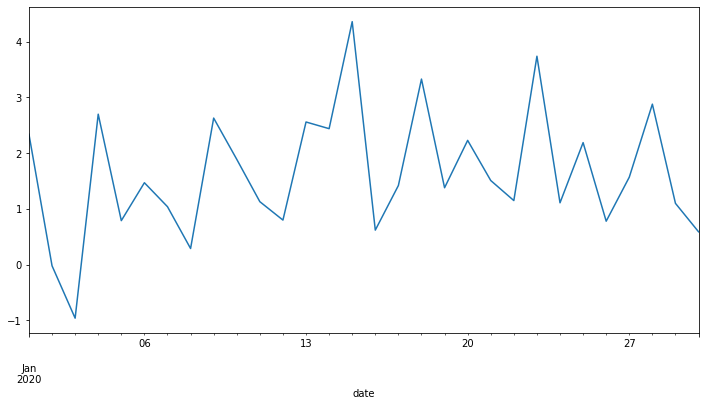

In [26]:
ax = df4['a'].plot(figsize=(12,6))
ax.autoscale(axis='x',tight=True)

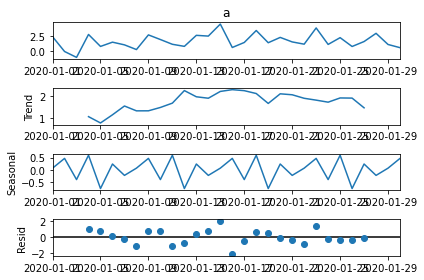

In [27]:
result = seasonal_decompose(df4['a'], model='add')
result.plot();

In [29]:
print('SE:',1/math.sqrt(len(df4['a'])-1))
SE=1/math.sqrt(len(df4['a'])-1)

SE: 0.18569533817705186


In [30]:
# we Observe that here seasonal component is present ... seasonal trend repeat after every 6 steps...


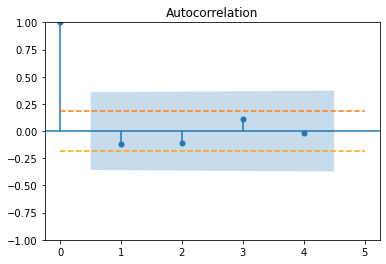

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation'
#lags = 4
plot_acf(df4,title=title,lags=4);
plt.plot([SE for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-SE for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

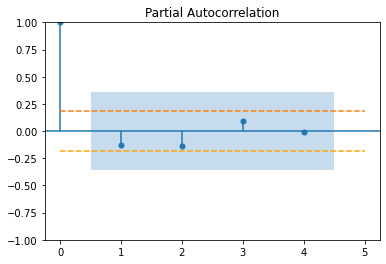

In [32]:
title='Partial Autocorrelation'
#lags=4
plot_pacf(df4,title=title,lags=4);
plt.plot([SE for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-SE for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

In [33]:
# from ACF and PACF plot we observe that no MA and no AR component present.

In [34]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [35]:
adf_test(df4['a'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.805622
p-value                  0.377674
# lags used              6.000000
# observations          23.000000
critical value (1%)     -3.752928
critical value (5%)     -2.998500
critical value (10%)    -2.638967
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [36]:
# data is non stationary ...... so we transform data to stationary 

<AxesSubplot:xlabel='date', ylabel='VALUES'>

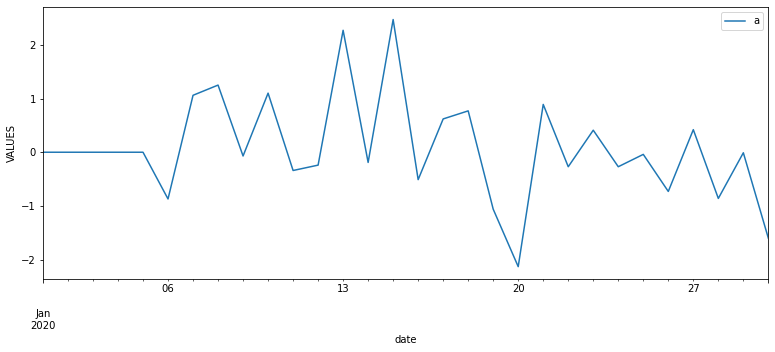

In [37]:
# Transform non-stationary to Stationary
df4['a']=df4['a'].diff(periods=5)
df4.fillna(0,inplace=True)
df4['a'].plot(figsize= (13,5), legend= True, ylabel='VALUES')

In [38]:
# Now data is stationary and constant pattern after 5 days

In [39]:
adf_test(df4['a'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -5.860673e+00
p-value                 3.416384e-07
# lags used             0.000000e+00
# observations          2.900000e+01
critical value (1%)    -3.679060e+00
critical value (5%)    -2.967882e+00
critical value (10%)   -2.623158e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [40]:
# Using period size 5 , data is stationary 

# Q4---------------------------------------------------
For the given set of data, 3.65, 8.03, 5.72, 4.93, 5.71, 4.79, 4.87, 6.48, 6.40, 6.41 find
the order of auto_arima model and check whether it is like ACF and PACF plots
observations. If, not same then compare the two models and specify which is the better
model and how we decide.

In [41]:
df5=pd.DataFrame({'a':[3.65, 8.03, 5.72, 4.93, 5.71, 4.79, 4.87, 6.48, 6.40, 6.41]})

In [42]:
auto_arima(df5['a'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -18.595
Date:                Tue, 01 Feb 2022   AIC                             45.189
Time:                        18:56:06   BIC                             46.399
Sample:                             0   HQIC                            43.861
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.007    145.877      0.000       0.987       1.013
ma.L1         -1.3208     23.919     -0.055      0.956     -48.201      45.559
ma.L2          0.3310      7.251      0.046      0.964     -13.881      14.543
sigma2         1.2967     30.758      0.042      0.966     -58.988      61.582
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.21   Prob(JB):                         0.70
Heteroskedasticity (H):               0.33   Skew:                             0.65
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# This Provide ARIMA Model (1,0,2) but there is seosonal component present.
# lets Check with ACF and PACF graphs

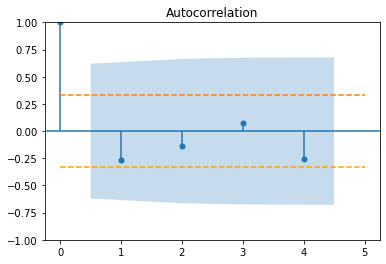

In [44]:
title = 'Autocorrelation'
#lags = 4
plot_acf(df5,title=title,lags=4);
plt.plot([0.333 for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-0.333 for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

In [45]:
# all ACF values are below SE=0.333
# No MA component present 

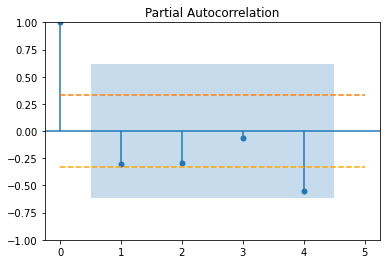

In [46]:
title='Partial Autocorrelation'
#lags=4
plot_pacf(df5,title=title,lags=4);
plt.plot([0.333 for i in range(0,6)], linestyle = 'dashed',) # SE line
plt.plot([-0.333 for i in range(0,6)], linestyle = 'dashed',color='orange')
plt.show()

In [47]:
# IN PACF plot value of PACF is larger at lag 4 
# AR component present p=4
# model provide by Auto_arima and using ACF and PACF plot is not same....


In [48]:
stepwise_fit = auto_arima(df5['a'], start_p=0, start_q=0,
                          max_p=5, max_q=5,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()
#lowest aic and bic values

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65.587, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=46.072, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=45.980, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=45.282, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=47.652, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=48.930, Time=0.42 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=45.189, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec

Best model:  ARIMA(1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -18.595
Date:                Tue, 01 Feb 2022   AIC                             45.189
Time:                        18:56:33   BIC                             46.399
Sample:                             0   HQIC                            43.861
                                 - 10                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.007    145.877      0.000       0.987       1.013
ma.L1         -1.3208     23.919     -0.055      0.956     -48.201      45.559
ma.L2          0.3310      7.251      0.046      0.964     -13.881      14.543
sigma2         1.2967     30.758      0.042      0.966     -58.988      61.582
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.21   Prob(JB):                         0.70
Heteroskedasticity (H):               0.33   Skew:                             0.65
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# lets Check Stationarity of data
adf_test(df5['a'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -2.011830
p-value                 0.281410
# lags used             3.000000
# observations          6.000000
critical value (1%)    -5.354256
critical value (5%)    -3.646238
critical value (10%)   -2.901198
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


<AxesSubplot:ylabel='VALUES'>

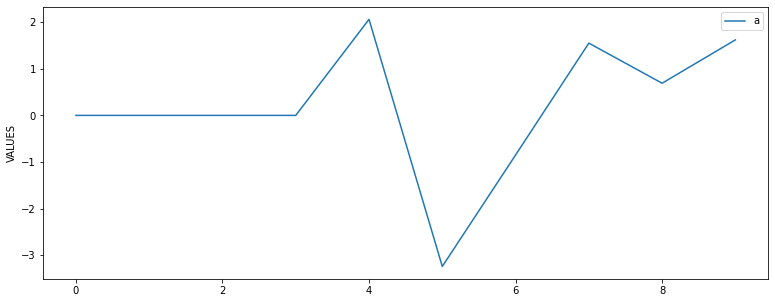

In [50]:
# Transform non-stationary to Stationary
df5['a']=df5['a'].diff(periods=4)
df5.fillna(0,inplace=True)
df5['a'].plot(figsize= (13,5), legend= True, ylabel='VALUES')

In [51]:
# lets Check Stationarity of data
adf_test(df5['a'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -2.955375
p-value                 0.039277
# lags used             0.000000
# observations          9.000000
critical value (1%)    -4.473135
critical value (5%)    -3.289881
critical value (10%)   -2.772382
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [52]:
# Now the data is stationary.


In [53]:
#We can use ARIMA methode to fit model .... in ARIMA methode we dont need to transform to stationary

Model ARIMA(1,0,2) is good because it has minimus AIC as compare to other models